Word:  BSNREORG ['BSN', 'R', 'EORG']


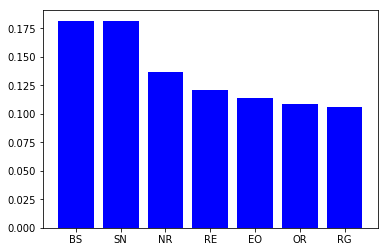

Word:  BSNPOP ['BSN', 'POP']


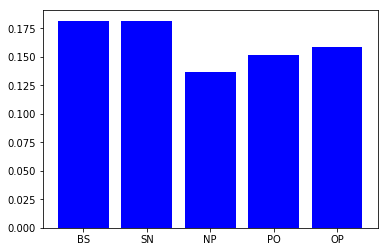

Word:  APOP ['A', 'POP']


In [8]:
%matplotlib inline

# Given words ["BSNREORG", "BSNPOP","APOP"]
# Results: 
# BSNREORG = BSN R EORG
# BSNPOP = BSN POP
# APOP = A POP

import matplotlib
import matplotlib.pyplot as plt
    
def getBigrams(word):
    bigram = ""
    bigrams= []
    for i in range ( len ( word ) ):
        bigram += word[i]
        if (len(bigram) == 2):
            bigrams.append(bigram)
            bigram = word[i]
    return bigrams

def buildBigramHistogram(words):
    bigramOccurence = {}
    for word in words:
        for bigram in getBigrams(word):
            if bigram not in bigramOccurence:
                bigramOccurence[bigram] = 0
            bigramOccurence[bigram] = bigramOccurence[bigram]+1

    for bigram in bigramOccurence:
        bigramOccurence[bigram] = bigramOccurence[bigram] / len(bigramOccurence)
    return bigramOccurence

def accumulateAverageBigramOccurenceCurve(bigramOccurence,word):
    y = []
    x = []
    k = 0
    bigrams = getBigrams(word)
    for bigram in bigrams:
        if k == 0: 
            accumulatedOccurence = bigramOccurence[bigram]
        else:
            accumulatedOccurence = (k-1)/k*accumulatedOccurence + bigramOccurence[bigram]/k;
        x.append(k)
        y.append(accumulatedOccurence)
        k = k + 1
    return { "x":x, "y":y, "bigrams":bigrams }

def findCurveSteps(y, threshold=0.001):
    ret = []
    yi = y[0]
    lastPeak = None
    length = len(y)
    for i in range(length):
        if (abs( y[i] -  yi ) > yi*threshold):
            ret.append(i) 
        yi = y[i]

    return ret


def splitWordByCurve(word, curve, threshold=0.001):
    prevStep = 0
    steps = findCurveSteps(curve["y"], threshold)
    steps.append( len(curve["y"])-1 )
    
    segments = []
    for step in steps:
        if (prevStep != step):
            segments.append([prevStep, step, ""])
            prevStep = step
    
    segments.sort(key=lambda seg: min(curve["y"][seg[0]], curve["y"][seg[1]]), reverse=True)
    
    token = []
    for i in range(len(word)):
        token.append('')
        
    for seg in segments:
        start = seg[0]
        stop = seg[1]
        
        if (stop == len(curve["y"])-1):
            stop = stop + 1
        if (token[start]):
            start = start + 1
        if (token[stop]):
            stop = stop - 1
        
        seg[2] = word[start:stop+1]
        
        for i in range(start,stop+1):
            token[i] = seg[2][i-start]
    
    segments.sort(key=lambda seg: seg[0])
    tokens = list(map(lambda seg: seg[2], segments))
    tokens = list( filter(lambda x: x != "", tokens) )
    return tokens


#
# Start
#

words = ["BSNREORG", "BSNPOP","APOP"]

bigramOccurence = buildBigramHistogram(words)
    
plt.bar(list(bigramOccurence.keys()), bigramOccurence.values(), color='g')
plt.show()

# examine accumulated average character occurence rates in each word
for word in words:
    curve = accumulateAverageBigramOccurenceCurve(bigramOccurence,word)
    tokens = splitWordByCurve(word,curve,threshold=0.1)
    
    print("Word: ",word, tokens)
    plt.bar(curve["x"], curve["y"], color='b')
    plt.xticks(curve["x"], curve["bigrams"])
    plt.show()

